In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

In [6]:
# Define the folder path and CSV file name
folder_path = "../EmployeeSQL/data/"
csv_file_name = "employees.csv"

# Read the CSV file
employees_df = pd.read_csv(f"{folder_path}/{csv_file_name}")

# Display the first few rows of the DataFrame
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [7]:
# Convert the 'hire_date' column to a datetime data type
employees_df['hire_date'] = pd.to_datetime(employees_df['hire_date'])

# Filter employees hired in 1986
employees_hired_1986 = employees_df[employees_df['hire_date'].dt.year == 1986]

# Select and display first name, last name, and hire date
result = employees_hired_1986[['first_name', 'last_name', 'hire_date']]
result

,first_name,last_name,hire_date
5,Eran,Cusworth,1986-11-14
14,Bojan,Zallocco,1986-10-14
19,Nevio,Demizu,1986-05-18
29,Ziva,Vecchi,1986-07-03
33,Mohit,Speek,1986-01-14
...,...,...,...
299986,Uriel,Heijenga,1986-06-30
299998,Ziyad,Constantine,1986-02-28
300006,Yishay,Maksimenko,1986-01-27
300007,Yannik,Ranai,1986-04-06


In [8]:
# Set the file path to the salaries CSV file
folder_path = "../EmployeeSQL/data/"
csv_file_name = "salaries.csv"
salaries_csv_file = f"{folder_path}{csv_file_name}"

# Create the salaries DataFrame
salaries_df = pd.read_csv(salaries_csv_file)

# Display the first few rows of the DataFrame
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [9]:
# Merge the two DataFrames on the 'emp_no' column
merged_df = pd.merge(employees_df, salaries_df, on='emp_no')

# Display the merged DataFrame
merged_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18,40000


In [10]:
# Set the file path to the dept_manager CSV file
folder_path = "../EmployeeSQL/data/"
dept_manager_csv_file = "dept_manager.csv"
dept_manager_csv_path = f"{folder_path}{dept_manager_csv_file}"

# Create the dept_manager DataFrame
dept_manager_df = pd.read_csv(dept_manager_csv_path)

# Display the first few rows of the DataFrame
dept_manager_df.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [11]:
# Set the file path to the departments CSV file
folder_path = "../EmployeeSQL/data/"
deptartments_csv_file = "dept_manager.csv"
deptartments_csv_path = f"{folder_path}{deptartments_csv_file}"

# Create the deptartments DataFrame
deptartments_df = pd.read_csv(deptartments_csv_path)

# Display the first few rows of the DataFrame
deptartments_df.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [12]:
# Set the file path to the titles CSV file
folder_path = "../EmployeeSQL/data/"
csv_file_name = "titles.csv"
titles_csv_file = f"{folder_path}{csv_file_name}"

# Create the titles DataFrame
titles_df = pd.read_csv(titles_csv_file)

# Display the first few rows of the DataFrame
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [25]:
# Merge the titles data with the merged_df 
merged_df = merged_df.merge(titles_df, left_on='emp_title_id', right_on='title_id')

# Drop the redundant 'title_id' column and all 'title' columns except one
merged_df = merged_df.drop(columns=['title_id', 'title_x', 'title_y']).rename(columns={'title': 'title'})

# Display the result
merged_df




,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,1988-10-14,40000,Manager


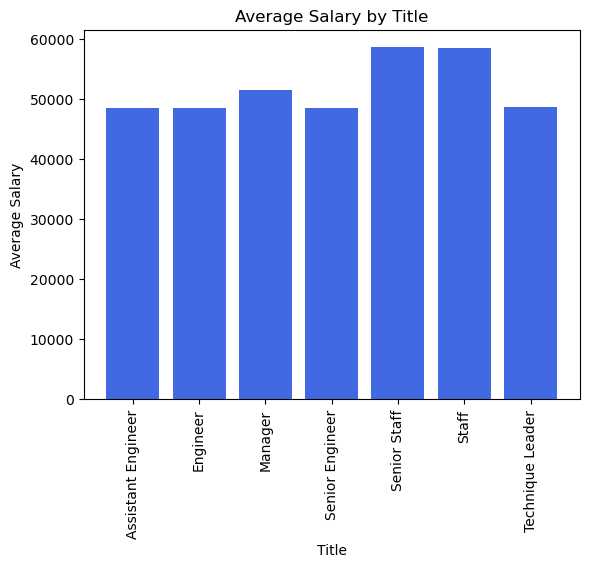

In [26]:
# Group the data by 'title' and calculate the average salary
salary_by_title = merged_df.groupby('title')['salary'].mean().reset_index()

plt.bar(salary_by_title['title'], salary_by_title['salary'], color='royalblue')
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the bar graph
plt.show()


Analysis of titile vs salary

----------------------------

As the graph indicates, staff and senior staff earn the highest compare to other titiles. 

It also evident that except managers, the rest of the titles are in a similar salary bracket. 

Based on the observation for any of the titles to earn more they will have to be promoted to the senior or manager level. This could have both a positive and negative consquence. Employees might have to compete hard to get promoted and earn more, which could result in high performance. On the other hand this could create unintended negative comeptition and affect employees morale.
